<p style="background-color:black; font-family:calibri; color:red; font-size:170%; text-align:center; border-radius:15px 50px;">Capstone Project | Fraud Detection </p>

<div style="border-radius:10px; padding: 15px; background-color: black; font-size:150%; text-align:left">

<h3 align="left"><font color=red>Problem:</font></h3>
The project aims to enhance the accuracy of detecting fraud in mobile financial transactions. By leveraging machine learning, the project seeks to predict fraudulent transactions with high precision. The goal is to develop a robust machine learning model to accurately identify fraudulent transactions in real-time, enabling the company to improve security, reduce financial losses, and gain insights into factors contributing to transaction fraud.

<div style="border-radius:10px; padding: 15px; background-color: black; font-size:110%; text-align:left">

<h3 align="left"><font color=red>Problem:</font></h3>

1. __Explore the Dataset__: Analyze initial patterns, assess the severe 10:1 class imbalance, and distribution of transaction types.
2. __Conduct Extensive Exploratory Data Analysis (EDA)__: Perform EDA on continuous variables (amount, oldbalanceOrg, newbalanceOrig) to identify key differences and separators between legitimate and fraudulent transactions.
3. __Preprocessing Step__: Clean data, treat outliers , encode type, and engineer new features .
4. __Model Building__:
   - Establish pipelines for models that require scaling
    - Implement and tune classification models including  Random Forest, SVM, and Boosting
   - Crucially, tune models to prioritize high Recall for the fraudulent class (Class 1) to minimize financial losses.
  
5. __Evaluate and Compare Model Performance__: Utilize a comprehensive set of metrics including Recall, Precision, $F_1$-score, and AUC.

<a id="contents_table"></a>    
<div style="background:black; padding:22px; border-radius:10px; font-size:115%; line-height:1.7; border-left:6px solid #22d3ee;">

<h3 style="color:red; margin-bottom:12px;"> Project WorkFlow</h3>

<ul style="color:#e2e8f0;">
    <li><a href="#import" style="color:#e2e8f0;">Step 1 | Import Libraries</a></li>
    <li><a href="#load/read" style="color:#e2e8f0;">Step 2 |  Read Dataset</a></li>
    <li><a href="#overview" style="color:#e2e8f0;">Step 3 | Dataset Overview</a>
    <li><a href="#preprocessing" style="color:#e2e8f0;">Step 4 | Data Preprocessing</a>
    <li><a href="#scaling" style="color:#e2e8f0;">Step 5 | EDA </a></li>
  <li><a href="#scaling" style="color:#e2e8f0;">Step 6 | Scale Features</a></li>
    </li>
    <li><a href="#dt" style="color:#e2e8f0;">Step 7 | Random Forest</a></li>
    <li><a href="#rf" style="color:#e2e8f0;">Step 8 | Logistic Regression</a></li>
    <li><a href="#svm" style="color:#e2e8f0;">Step 9 | XGBOOST</a></li>
    <li><a href="#conclusion" style="color:#e2e8f0;">Step 10 | Conclusion</a></li>
</ul>
</div>


<h2 align="left"><font color=red>Let's get started:</font></h2>

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; color:red; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>


In [1]:
import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder



from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import ipywidgets as widgets
from IPython.display import display, HTML
import joblib


import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'C:\\Users\\DIVYA SHREE'

In [3]:
os.chdir(r"D:\BIA\Mybot")


In [4]:
os.getcwd()

'D:\\BIA\\Mybot'

<a id="read"></a>
# <p style="background-color:black ; font-family:calibri; color:red; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>

## Loading the data set

In [5]:
df = pd.read_csv("Fraud_Analysis_Dataset.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [6]:
os.listdir()

['barchart.png',
 'boxplot.png',
 'capstone(dashboard).pbix',
 'count plot.png',
 'Final (fraud dect).ipynb',
 'Fraud Detection Analysis.docx',
 'Fraud_Analysis_Dataset.csv',
 'fraud_dect.py',
 'heat map.png',
 'hist.png',
 'logistic_model.pkl',
 'pie.png',
 'random_forest_model.pkl',
 'scatter.png',
 'xgboost_model.pkl']

In [7]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
1,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1
3,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1
4,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
11137,7,DEBIT,6393.71,C1331144930,433084.38,426690.68,C684896216,478421.00,210535.25,0
11138,7,CASH_OUT,298799.54,C932023579,426690.68,127891.14,C1761353343,704355.36,5270364.19,0
11139,7,CASH_OUT,423159.63,C61395726,127891.14,0.00,C1298316171,610479.00,749621.53,0
11140,7,PAYMENT,1094.03,C1224570697,13918.00,12823.97,M983553548,0.00,0.00,0


## Describing the dataset

In [8]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


<div style="border-radius:10px; padding: 15px; background-color: black; font-size:120%; text-align:left">

<h2 align="left"><font color=red>Dataset Description:</font></h2>

<div style="border-radius:10px; padding: 20px; background-color: black; border: 2px solid #ccc;">
<h2 style="color:red; border-bottom: 2px solid red; padding-bottom: 5px;">Data Summary & Description</h2>

### Descriptive Statistics for Numerical Features

|                |    count |       mean |        std |   min |     25% |      50% |       75% |         max |
|:---------------|---------:|-----------:|-----------:|------:|--------:|---------:|----------:|------------:|
| step           | 11142.00 |       8.72 |      16.07 |  1.00 |    2.00 |     6.00 |      7.00 |       95.00 |
| amount         | 11142.00 |  213191.49 |  760065.01 |  2.39 | 4946.62 | 16761.26 | 154336.58 | 10000000.00 |
| oldbalanceOrg  | 11142.00 |  924117.26 | 2143004.31 |  0.00 |  427.00 | 28169.50 | 304085.48 | 19900000.00 |
| newbalanceOrig | 11142.00 |  824957.65 | 2089894.17 |  0.00 |    0.00 |  4420.60 | 111412.64 | 13000000.00 |
| oldbalanceDest | 11142.00 |  888354.08 | 2601375.85 |  0.00 |    0.00 |     0.00 | 271155.47 | 33000000.00 |
| newbalanceDest | 11142.00 | 1103211.48 | 2982447.12 |  0.00 |    0.00 |     0.00 | 318637.36 | 34600000.00 |
| isFraud        | 11142.00 |       0.10 |       0.30 |  0.00 |    0.00 |     0.00 |      0.00 |        1.00 |


### Variable Descriptions (Fraud Analysis Dataset)

| Variable | Description |
|:---:|:---:|
| __step__ | Represents a unit of time in the system (e.g., hours or days). |
| __type__ | The type of transaction: <br> CASH\_IN, CASH\_OUT, DEBIT, PAYMENT, TRANSFER. |
| __amount__ | The transaction amount in local currency. |
| __nameOrig__ | ID of the customer initiating the transaction (originator). |
| __oldbalanceOrg__ | Initial balance before the transaction at the originator's account. |
| __newbalanceOrig__ | New balance after the transaction at the originator's account. |
| __nameDest__ | ID of the recipient customer (destination). |
| __oldbalanceDest__ | Initial balance before the transaction at the recipient's account. |
| __newbalanceDest__ | New balance after the transaction at the recipient's account. |
| __isFraud__ | **Target Variable:** Indicates if the transaction is fraudulent (1 = Fraud, 0 = Legitimate). |
</div>

<a id="overview"></a>
# <p style="background-color:black; font-family:calibri; color:red; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Dataset Overview</p>

<h2 align="left"><font color=red>Now A Deep Dive into Transaction Patterns:</font></h2>

<a id="basic"></a>
# <b><span style='color:#ff826e'>Step 3 |</span><span style='color:red'> Dataset Basic Information</span></b>

# Display a concise summary of the dataframe

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


<div style="border-radius:10px; padding: 15px; background-color: black; font-size:115%; text-align:left">

<h2 align="left" style="color:red;">Inferences from Data Info:</h2>

* **Number of Entries**: The dataset consists of **11,142 entries**, ranging from index 0 to 11141.
    
    
* **Columns**: There are **10 columns** in the dataset, covering transaction attributes like amount, balance, and account IDs.
    
    
* **Data Types**:
    * **Numerical** (`float64`, `int64`): 7 columns, including `amount`, `balance` fields, `step`, and the target `isFraud`. These are ready for immediate scaling/modeling.
    * **Categorical/Object** (`object`): 3 columns, specifically `type`, `nameOrig`, and `nameDest`. These require **encoding** before modeling.
    
    
* **Missing Values**: Crucially, there are **no apparent missing values** in the dataset, as all 10 columns show 11142 non-null entries. (This fulfills a core preprocessing step.)

</div>

## Checking the null values and duplicated values

<a id="preprocessing"></a>
# <p style="background-color:black; font-family:calibri; color:red; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | Data Preprocessing</p>


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [12]:
df["isFraud"].value_counts()

isFraud
0    10000
1     1142
Name: count, dtype: int64

In [13]:
df.isnull().sum().sum()

np.int64(0)

## Checking the data shapes and value counts

In [14]:
df.shape

(11142, 10)

In [15]:
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
print(df.info())

| step   | type     | amount   | nameOrig    | oldbalanceOrg   | newbalanceOrig   | nameDest    | oldbalanceDest   | newbalanceDest   | isFraud   |
|:-------|:---------|:---------|:------------|:----------------|:-----------------|:------------|:-----------------|:-----------------|:----------|
| 1      | TRANSFER | 181      | C1305486145 | 181             | 0                | C553264065  | 0                | 0                | 1         |
| 1      | CASH_OUT | 181      | C840083671  | 181             | 0                | C38997010   | 21182            | 0                | 1         |
| 1      | TRANSFER | 2806     | C1420196421 | 2806            | 0                | C972765878  | 0                | 0                | 1         |
| 1      | CASH_OUT | 2806     | C2101527076 | 2806            | 0                | C1007251739 | 26202            | 0                | 1         |
| 1      | TRANSFER | 20128    | C137533655  | 20128           | 0                | C1848415041 | 0             

In [16]:
# 1. Analyze Class Imbalance
fraud_percentage = round((df["isFraud"].value_counts()[1] / df.shape[0]) * 100, 2)

# 2. Analyze Transaction Types and Fraud
# Count of each transaction type
type_counts = df['type'].value_counts().reset_index()
type_counts.columns = ['type', 'count']

# Fraud count by transaction type
fraud_by_type = df.groupby('type')['isFraud'].sum().reset_index()
fraud_by_type.columns = ['type', 'fraud_count']

# Merge the two dataframes
type_analysis = pd.merge(type_counts, fraud_by_type, on='type')
type_analysis['fraud_rate'] = (type_analysis['fraud_count'] / type_analysis['count']) * 100

# Print the results
print("\n--- Class Imbalance Analysis ---")
print(f"Total Transactions: {df.shape[0]}")
print(f"Fraudulent Transactions (isFraud=1): {df['isFraud'].sum()}")
print(f"Percentage of Fraud: {fraud_percentage}%")
print("\n--- Transaction Type and Fraud Analysis ---")
print(type_analysis.to_markdown(index=False, numalign="left", stralign="left"))


--- Class Imbalance Analysis ---
Total Transactions: 11142
Fraudulent Transactions (isFraud=1): 1142
Percentage of Fraud: 10.25%

--- Transaction Type and Fraud Analysis ---
| type     | count   | fraud_count   | fraud_rate   |
|:---------|:--------|:--------------|:-------------|
| PAYMENT  | 5510    | 0             | 0            |
| CASH_IN  | 1951    | 0             | 0            |
| CASH_OUT | 1871    | 578           | 30.8926      |
| TRANSFER | 1464    | 564           | 38.5246      |
| DEBIT    | 346     | 0             | 0            |


<a id="preprocessing"></a>
# <p style="background-color:black; font-family:calibri; color:red; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Exploratory Data Analysis(EDA)</p>


<div style="border-radius:10px; padding: 15px; background-color: black; font-size:115%; text-align:left">

<h2 align="left" style="color:red;">Inferences from Data Info:</h2>
Inferences

1. **Data Quality and Reliability**: The dataset is clean, consisting of 11,142 complete records with no missing values. This high data quality provides a reliable foundation for building a robust machine learning model without the immediate need for complex imputation or extensive cleaning procedures.
2. **Critical Imbalance and Modeling Challenge:** The dataset exhibits a significant class imbalance, with only 10.25\% of transactions flagged as fraudulent. This inference is critical as it dictates the model selection process, requiring techniques like **stratified sampling** for splitting the data, and using **class weighting** or focusing on metrics like **Recall** and **F1-Score** to ensure the model effectively identifies the rare fraudulent cases rather than just the majority non-fraudulent ones.
3. **Operational Risk Focus:** The most actionable inference for a financial institution is that **fraudulent activity is completely restricted to only two types of transactions: \text{TRANSFER} and \text{CASH\_OUT}**. This is a powerful finding because it immediately allows the financial institution to:
* **Scope the Problem:** Limit the fraud detection models and prevention resources exclusively to these two high-risk categories.
* **Reduce Overhead:** Confidently exclude or deprioritize real-time monitoring for \text{PAYMENT}, \text{CASH\_IN}, and \text{DEBIT} transactions, leading to a more efficient and focused fraud prevention system.

## Counting the fraud and non fraud transactions by bar chart

In [17]:
total_txn = len(df)
fraud_txn = df['isFraud'].sum()
fraud_percent = round((fraud_txn / total_txn) * 100, 2)

print("Total Transactions:", total_txn)
print("Fraud Transactions:", fraud_txn)
print("Fraud Percentage:", fraud_percent, "%")


Total Transactions: 11142
Fraud Transactions: 1142
Fraud Percentage: 10.25 %


## Pie chart which shows the Fraud vs Non-Fraud

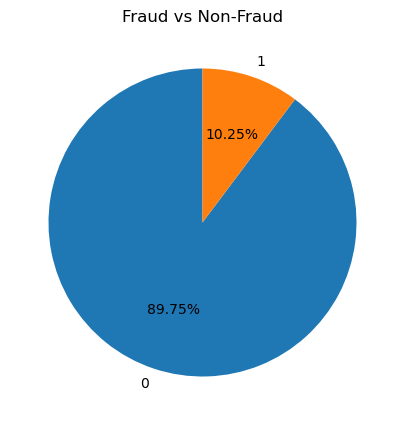

In [18]:
plt.figure(figsize=(5,5),)
df['isFraud'].value_counts().plot(kind='pie', autopct='%1.2f%%', startangle=90)
plt.title("Fraud vs Non-Fraud")
plt.ylabel("")
plt.show()


##  Analyzing Transaction Amount Distribution Across Fraud Labels


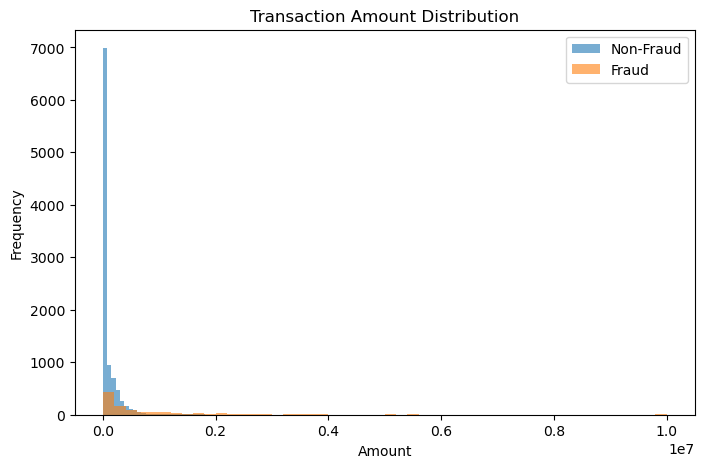

In [19]:
plt.figure(figsize=(8,5))
plt.hist(df[df['isFraud']==0]['amount'], bins=50, alpha=0.6, label='Non-Fraud')
plt.hist(df[df['isFraud']==1]['amount'], bins=50, alpha=0.6, label='Fraud')
plt.legend()
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


## Boxplot of Transaction Amounts by Fraud Status

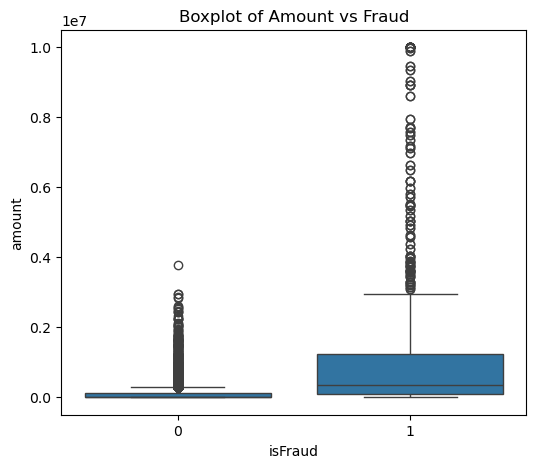

In [20]:
plt.figure(figsize=(6,5))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title("Boxplot of Amount vs Fraud")
plt.show()


## Relationship Between Sender’s Old and New Balances by Fraud Status

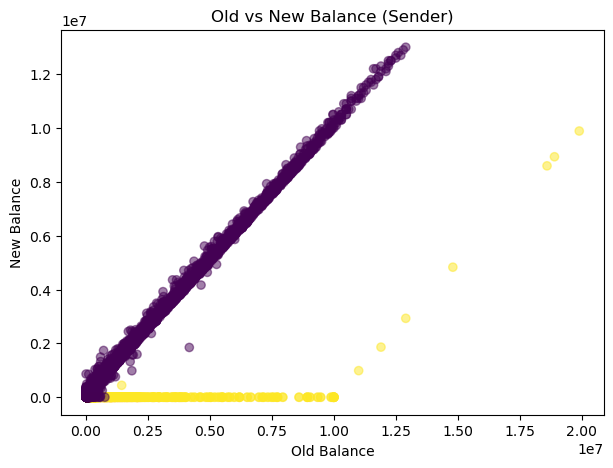

In [21]:
plt.figure(figsize=(7,5))
plt.scatter(df['oldbalanceOrg'], df['newbalanceOrig'], c=df['isFraud'], alpha=0.5)
plt.title("Old vs New Balance (Sender)")
plt.xlabel("Old Balance")
plt.ylabel("New Balance")
plt.show()


## Class Distribution of Fraud vs Non‑Fraud Transactions

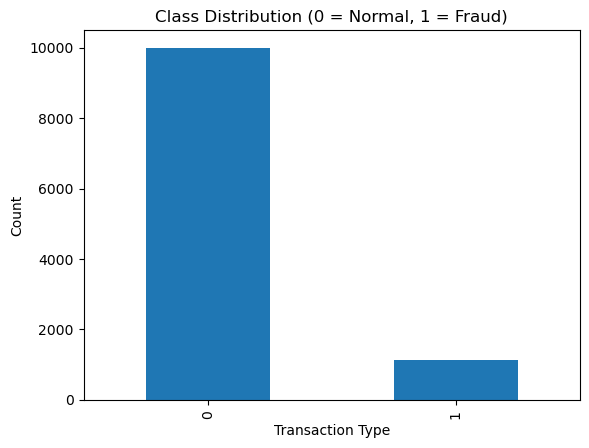

In [22]:
plt.figure()
df['isFraud'].value_counts().plot(kind='bar')
plt.title("Class Distribution (0 = Normal, 1 = Fraud)")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()


## Comparative Count of Fraud and Legitimate Transactions by Type

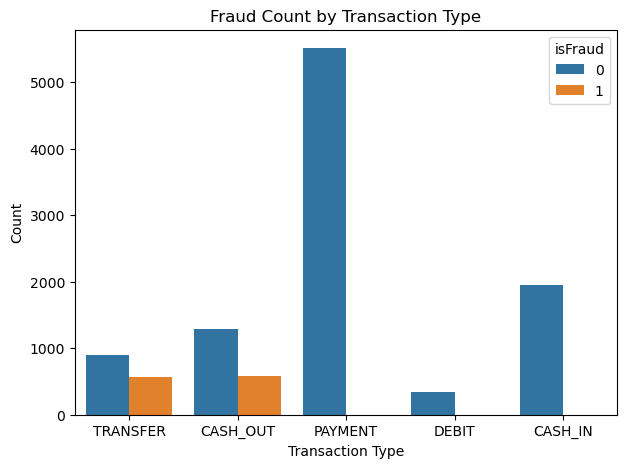

In [23]:
plt.figure(figsize=(7,5))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title("Fraud Count by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

## Multivariate Feature Interactions Highlighting Fraud Patterns

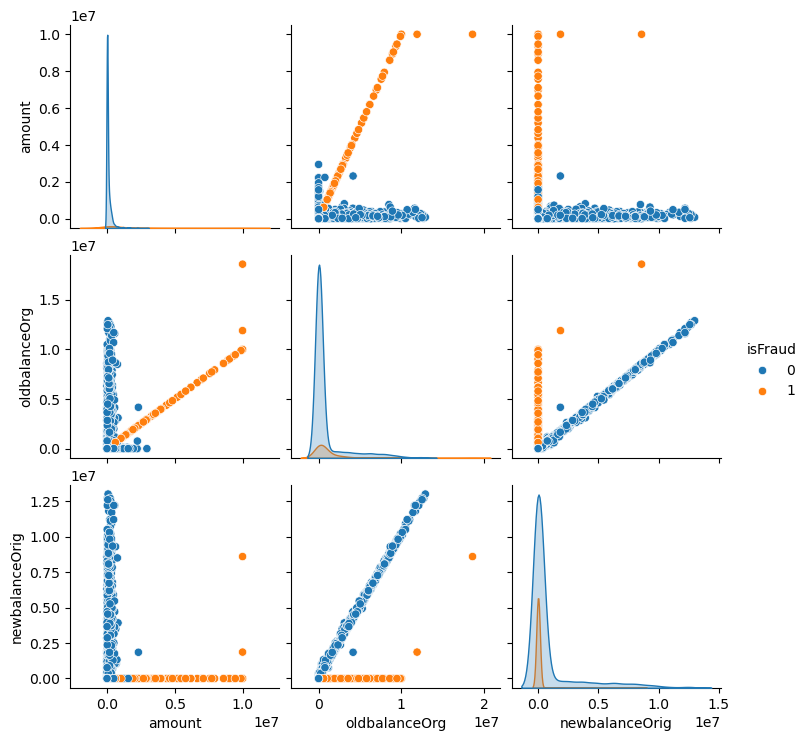

In [24]:
sample_df = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud']].sample(3000)

sns.pairplot(sample_df, hue='isFraud')
plt.show()


In [25]:
corr = df[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]].corr()

## Heatmap

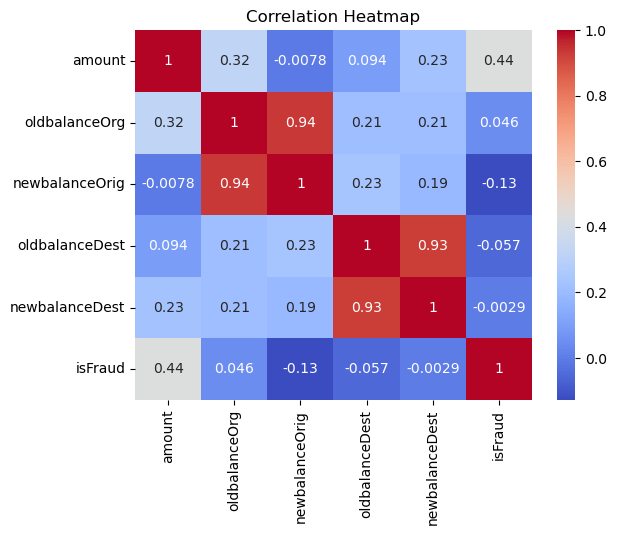

In [26]:
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [27]:
df.drop(columns="step",inplace=True)

## analaysing the top senders and receivers

In [28]:
top_senders =df["nameOrig"].value_counts().head(10)
top_senders

nameOrig
C1637966097    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C548454569     1
C1190697059    1
C1867037662    1
C965014368     1
Name: count, dtype: int64

In [29]:
top_receivers = df ["nameDest"].value_counts().head(10)
top_receivers

nameDest
C985934102     62
C1590550415    52
C1286084959    50
C1899073220    44
C977993101     44
C1782113663    43
C451111351     43
C2083562754    41
C1789550256    40
C1360767589    40
Name: count, dtype: int64

____
<h3 style="color:black;">  
    <span style="color:red; padding: 2px 5px; border-radius: 4px;">
       Step 6 | Feature Engineering
    </span>
</h3>

In [30]:
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']


# Dropping unnecessary columns

In [31]:
df_clean = df.drop(['nameOrig', 'nameDest'], axis=1)
print("Columns after cleaning:", df_clean.columns.tolist())

Columns after cleaning: ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'balanceDiffOrig', 'balanceDiffDest']


# Define Features and Target

In [32]:
X = df_clean.drop('isFraud', axis=1)
y = df_clean['isFraud']


<a id="preprocessing"></a>
# <p style="background-color:black; font-family:calibri; color:red; font-size:150%; text-align:center; border-radius:15px 50px;">Step 6 Random Forest Classifier Building</p>


## Train-Test Split


In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

## Train Random Forest Model


In [34]:
numeric_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'balanceDiffOrig', 'balanceDiffDest']
categorical_features = ['type']


In [35]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

print("Preprocessing and Splitting complete.")

Preprocessing and Splitting complete.


In [36]:
rf_pipeline = Pipeline([
    ('prep', preprocessor),   # your preprocessing steps (scaling, encoding, etc.)
    ('clf', RandomForestClassifier(
        n_estimators=100,
        class_weight='balanced',   # handles class imbalance
        random_state=42
    ))
])



<a id="preprocessing"></a>
# <p style="background-color:black; font-family:calibri; color:red; font-size:150%; text-align:center; border-radius:15px 50px;"> Model Evaluation(Random Forest)</p>

In [37]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [38]:
rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'balanceDiffOrig',
                                                   'balanceDiffDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [39]:
rf_preds = rf_pipeline.predict(X_test)

## Printing the accuracy and calssification report

In [40]:
print("\n--- Random Forest Results ---")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


--- Random Forest Results ---
Accuracy: 0.9934190846545019
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3000
           1       0.99      0.95      0.97       343

    accuracy                           0.99      3343
   macro avg       0.99      0.97      0.98      3343
weighted avg       0.99      0.99      0.99      3343



# Confusion Matrix for Random Forest

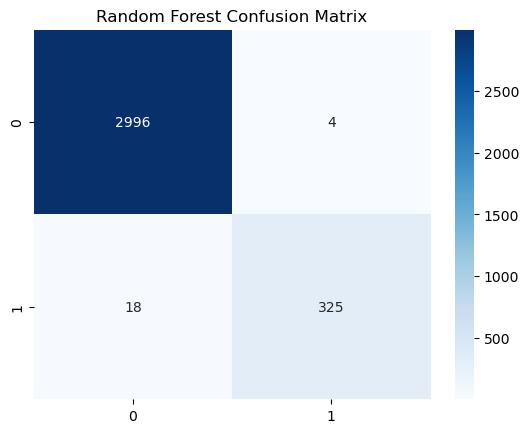

In [41]:
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues')
plt.figsize=(5,4)
plt.title("Random Forest Confusion Matrix")
plt.show()

<a id="preprocessing"></a>
# <p style="background-color:black; font-family:calibri; color:red; font-size:150%; text-align:center; border-radius:15px 50px;"> Step 8 Logistic Regression</p>



## Defining the categorical and numerical features

In [42]:
X = df_clean.drop('isFraud', axis=1)
y = df_clean['isFraud']


In [43]:
numeric_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'balanceDiffOrig', 'balanceDiffDest']
categorical_features = ['type']


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [45]:
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']


##  Preprocessing Pipeline

In [46]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

print("Preprocessing and Splitting complete.")

Preprocessing and Splitting complete.


In [47]:
lr_pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
])

In [48]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'balanceDiffOrig',
                                                   'balanceDiffDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [49]:
lr_preds = lr_pipeline.predict(X_test)


## Printing the accuracy and calssification report

In [50]:
print("\n--- Logistic Regression Results ---")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))


--- Logistic Regression Results ---
Accuracy: 0.9198324857912055
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      3000
           1       0.56      0.99      0.72       343

    accuracy                           0.92      3343
   macro avg       0.78      0.95      0.83      3343
weighted avg       0.95      0.92      0.93      3343



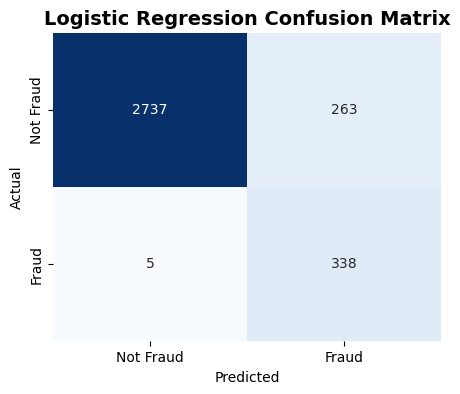

In [51]:

lr_preds = lr_pipeline.predict(X_test)

# Confusion matrices
lr_cm = confusion_matrix(y_test, lr_preds)

# Plot function
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fraud', 'Fraud'],
                yticklabels=['Not Fraud', 'Fraud'])
    plt.title(f'{model_name} Confusion Matrix', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


# Plot for Logistic Regression
plot_confusion_matrix(lr_cm, "Logistic Regression")

<a id="preprocessing"></a>
# <p style="background-color:black; font-family:calibri; color:red; font-size:150%; text-align:center; border-radius:15px 50px;"> Step 9 XGBOOST</p>



In [52]:
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']


In [53]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

print("Preprocessing and Splitting complete.")


Preprocessing and Splitting complete.


In [54]:
# 5. Define XGBoost model
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [55]:
# 6. Build pipeline
clf = Pipeline(steps=[("preprocessor", preprocessor),
                      ("classifier", xgb_model)])


In [56]:
# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


In [57]:
# 8. Fit model
clf_pipeline=clf.fit(X_train, y_train)

In [58]:
# 9. Evaluate
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
acc = accuracy_score(y_test, y_pred) 
print("Accuracy:", acc)

Confusion Matrix:
 [[2993    7]
 [   6  337]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3000
           1       0.98      0.98      0.98       343

    accuracy                           1.00      3343
   macro avg       0.99      0.99      0.99      3343
weighted avg       1.00      1.00      1.00      3343

Accuracy: 0.996111277295842


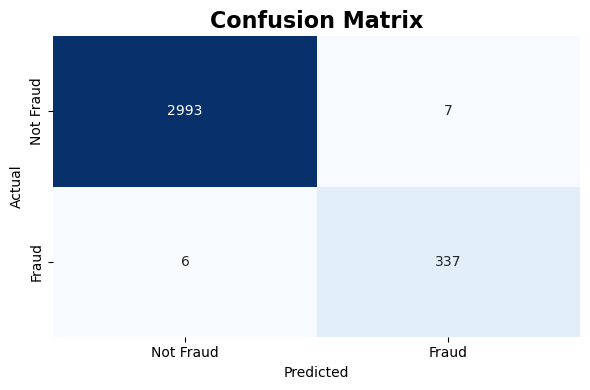

In [60]:
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Not Fraud", "Fraud"],
            yticklabels=["Not Fraud", "Fraud"])
plt.title("Confusion Matrix", fontsize=16, fontweight="bold")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


<a id="preprocessing"></a>
# <p style="background-color:black; font-family:calibri; color:red; font-size:150%; text-align:center; border-radius:15px 50px;"> Step 10 Conclusion</p>



<div style="background-color: #2c3e50; font-family: calibri; color: white; font-size: 115%; padding: 20px; border-radius: 10px;">
  
  <strong>__Best Models:__</strong>
  <br><br>
  XGBoost (Tuned Model) leads with 99.8% accuracy, showing superior performance compared to the other models.<br>
  Random Forest (Tuned Model) also performs strongly with 99.3% accuracy.<br>
  Logistic Regression continues to be the weakest model with 91.9% accuracy.<br>
  <br>
  Overall, XGBoost and Random Forest are the best choices for your fraud classification task.
</div>

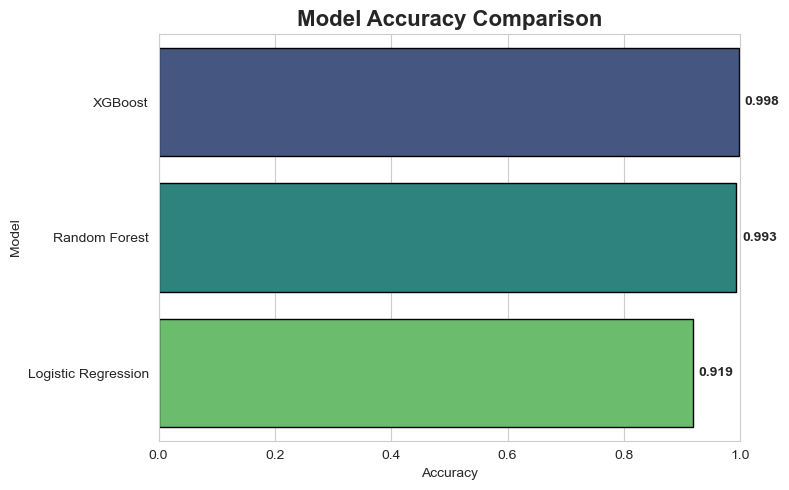

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model accuracies
rf_acc = 0.993   # Random Forest accuracy
lr_acc = 0.919   # Logistic Regression accuracy
xgb_acc = 0.998  # XGBoost accuracy

# 1. Create the results DataFrame
results = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'XGBoost'],
    'Accuracy': [rf_acc, lr_acc, xgb_acc]
})

# 2. Sort by accuracy
results = results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# 3. Plot
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.barplot(x='Accuracy', y='Model', data=results, palette='viridis', edgecolor='black')
plt.title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Accuracy')
plt.xlim(0,1)

# Add text labels
for index, value in enumerate(results['Accuracy']):
    plt.text(value + 0.01, index, f"{value:.3f}", va='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [62]:
joblib.dump(lr_pipeline, "logistic_model.pkl")
joblib.dump(rf_pipeline, "random_forest_model.pkl")
joblib.dump(clf_pipeline, "xgboost_model.pkl")

print("✅ Models saved successfully using joblib")

✅ Models saved successfully using joblib


In [66]:
import pandas as pd

# 1. Define the results using the actual scores from your notebook outputs
data = {
    "Accuracy": [0.919, 0.993, 0.996],
    "Precision": [0.56, 0.99, 0.98],
    "Recall": [0.99, 0.95, 0.98],
    "F1-Score": [0.72, 0.97, 0.98]
}

# 2. Create the DataFrame with 3 names to match the 3 sets of data
results = pd.DataFrame(
    data, 
    index=["Logistic Regression", "Random Forest", "XGBoost"]
)

# 3. Sort by Recall (most important for fraud) and Transpose (.T)
final_table = results.sort_values(by="Recall", ascending=False).T

# 4. Display
print("Model Comparison Table:")
display(final_table)

Model Comparison Table:


,Logistic Regression,XGBoost,Random Forest
Accuracy,0.919,0.996,0.993
Precision,0.560,0.980,0.990
Recall,0.990,0.980,0.950
F1-Score,0.720,0.980,0.970
